## Интеллектуальный анализ данных – весна 2023
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [2]:
data = load_wine()
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']
X.head(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [3]:
print('Количество пропущенных значений', X.isnull().sum().sum())  # проверка на пропуски
print(X.dtypes)  # видим, что все данные имеют тип float64 => нет категориальных признаков

Количество пропущенных значений 0
alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
dtype: object


**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [4]:
# разделение выборки на тренировочную и тестовую
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# проверка размеров выборок
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

X_train: (124, 13), y_train: (124,)
X_test: (54, 13), y_test: (54,)


**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [6]:
# список значений числа соседей
knn_values = [1, 3, 5, 10, 15, 25]

# Выбор двух признаков
X = X[['alcohol', 'magnesium']]

# Разбиение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=np.random.seed(17))

# Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = []
# Обучение шести классификаторов kNN с разным числом соседей
for k in knn_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    models.append(knn)
    knn.fit(X_train_scaled, y_train)
    # Вычисление доли правильных ответов на тренировочной и тестовой выборках
    train_accuracy = knn.score(X_train_scaled, y_train)
    test_accuracy = knn.score(X_test_scaled, y_test)
    # выводим доли правильных ответов с точностью до 5 знаков после запятой
    print(f"kNN (k={k}):")
    print(f"Доля правильных ответов на тренировочной выборке: {train_accuracy:.5f}")
    print(f"Доля правильных ответов на тестовой выборке: {test_accuracy:.5f}\n")

kNN (k=1):
Доля правильных ответов на тренировочной выборке: 0.99194
Доля правильных ответов на тестовой выборке: 0.68519

kNN (k=3):
Доля правильных ответов на тренировочной выборке: 0.78226
Доля правильных ответов на тестовой выборке: 0.62963

kNN (k=5):
Доля правильных ответов на тренировочной выборке: 0.79032
Доля правильных ответов на тестовой выборке: 0.70370

kNN (k=10):
Доля правильных ответов на тренировочной выборке: 0.75806
Доля правильных ответов на тестовой выборке: 0.62963

kNN (k=15):
Доля правильных ответов на тренировочной выборке: 0.77419
Доля правильных ответов на тестовой выборке: 0.68519

kNN (k=25):
Доля правильных ответов на тренировочной выборке: 0.75806
Доля правильных ответов на тестовой выборке: 0.62963



**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

In [ ]:
% pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [7]:
from mlxtend.plotting import plot_decision_regions
from matplotlib import gridspec
from itertools import product

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

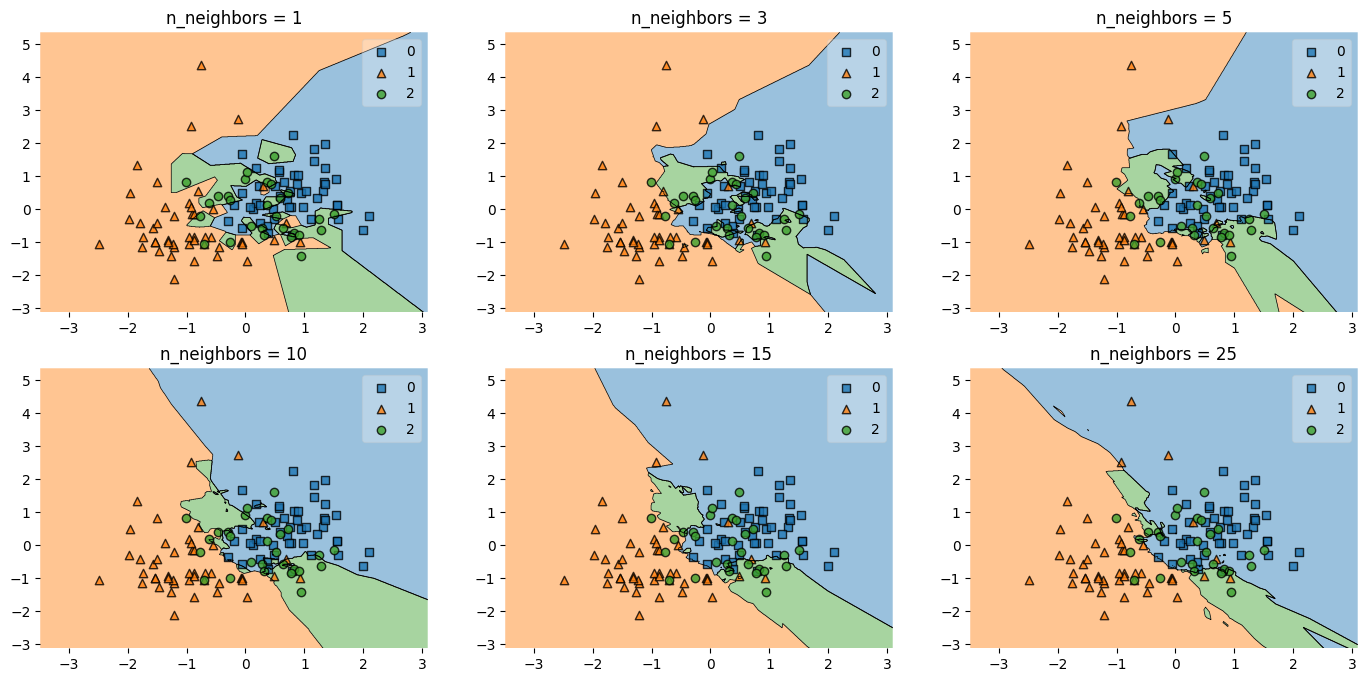

In [8]:
# создаем объект класса GridSpec с параметрами: 2 строки, 3 столбца.
gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize=(17,8))


# если не использовать метод product, то будет 2 вложенных цикла, сложно тсть o(n^2)
labels = ['n_neighbors = 1', 'n_neighbors = 3', 'n_neighbors = 5', 'n_neighbors = 10', 'n_neighbors = 15', 'n_neighbors = 25']
for clf, lab, grd in zip(models, labels, product([0, 1, 2], repeat=2)):
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X_train_scaled, y_train, clf)
    plt.title(lab)

plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

**Для задания 1.3**
На тренировочной выборке доля правильных ответов уменьшается с увеличением числа соседей. На тестовой выборке доля правильных ответов уменьшается сначала, а затем увеличивается до значения  0.7 при числе соседей 5, после чего начинает убывать(при увеличении числа соседей)

**Для задания 1.5**
При k = 1, 3, 5 поверхность имеет узкие выступы, а при k = 10, 15, 25 поверхность становится более гладкой. При малых значениях k соседей классификатор пытается точно разделить каждый объект, а это может привести к переобучению. При больших значениях k соседей классификатор учитывает все более широкую область для определения класса объекта, это может улучшить обобщающую способность модели, но при этом может уменьшить точность классификации на объектах с более мелкими деталями в данных.

**Оптимальное число соседей**
Исходя из вышесказанного можно сказать, что наилучшим числом соседей для данной задачи является k=5. Оно позволяет достаточно точно разделить классы и при этом не приводит к переобучению модели.


### Задание 2. KNN своими руками. 2 Балла

В данном задании мы попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

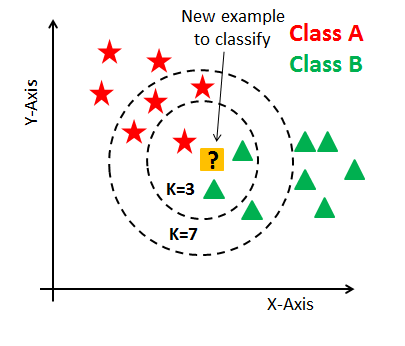

In [41]:
import numpy as np
from collections import Counter


class KNN:
    def __init__(self, k: int):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
 
    def predict(self, X) -> np.array:
        array = []
        for i in range(0, len(X)):
            lengths = np.sqrt(np.sum((self.X_train - X[i]) ** 2, axis=1))
            k_nearest_classes = self.y_train[np.argsort(lengths)[:self.k]]
            array.append(Counter(k_nearest_classes).most_common(1)[0][0])

        return np.array(array)

In [42]:
# Не меняйте файл!
def test_knn(KNN):
    knn = KNN(k=1)
    X_train = np.array([[1, 1], [2, 2]])
    y_train = np.array([0, 1])
    X_test = np.array([[1.5, 1.5]])
    knn.fit(X_train, y_train)
    assert knn.predict(X_test) == [0]

    knn = KNN(k=3)
    X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
    y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
    X_test = np.array([[9.5, 9.5]])
    knn.fit(X_train, y_train)
    assert knn.predict(X_test) == [1]

    knn = KNN(k=3)
    X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
    y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
    X_test = np.array([[5.5, 5.5]])
    knn.fit(X_train, y_train)
    assert knn.predict(X_test) == [1]

    knn = KNN(k=3)
    X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
    y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
    X_test = np.array([[15, 15]])
    knn.fit(X_train, y_train)
    assert knn.predict(X_test) == [1]

    knn = KNN(k=3)
    X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
    y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
    X_test = np.array([[5, 5], [2, 2]])
    knn.fit(X_train, y_train)
    assert all(knn.predict(X_test) == [1, 0])

In [43]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

### Задание 3: Линейная регрессия.

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [17]:
data = pd.read_csv('diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [18]:
if data.isnull().sum().sum() == 0:
    print('Нет пропущенных значений')
else:
    data = data.dropna()
data.head(5)

Нет пропущенных значений


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [19]:
# удалим столбец с нумерацией, который не несёт никакого смысла
print('Количество столбцов до удаления:', len(data.columns.tolist()))
data = data.drop('Unnamed: 0', axis=1)
print('Количество столбцов после удаления:', len(data.columns.tolist()))

Количество столбцов до удаления: 11
Количество столбцов после удаления: 10


**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [20]:
corr_matrix = data.corr()
real = ['carat', 'depth', 'table', 'x', 'y', 'z']

"""
Из данной матрицы видно, что сильнее всего коррелируют признаки 'carat, x, y, z', потому что они больше остальных
"""

abs(corr_matrix)

C:\Users\isgul\AppData\Local\Temp\ipykernel_14232\2895805846.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,0.295779,0.010647,0.025289,0.029341,0.094924
table,0.181618,0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [21]:
target = data['price']
data = data.drop('price', axis=1)
new_data = pd.get_dummies(data, columns=['cut', 'color', 'clarity'])
new_data.head(3)

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,3.95,3.98,2.43,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,3.89,3.84,2.31,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,4.05,4.07,2.31,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [25]:
# разделение выборки на тренировочную и тестовую
data_train, data_test, target_train, target_test = \
    train_test_split(new_data, target, test_size=0.3, random_state=np.random.seed(17))
# проверка размеров выборок
print(f"data_train: {data_train.shape}\ntarget_train: {target_train.shape}")
print(f"data_test: {data_test.shape}\ntarget_test: {target_test.shape}")
data_train.head(3)

data_train: (37758, 26)
target_train: (37758,)
data_test: (16182, 26)
target_test: (16182,)


,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
19497,1.21,61.3,57.0,6.92,6.87,4.23,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
31229,0.31,62.0,56.0,4.38,4.36,2.71,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
22311,1.21,62.4,57.0,6.75,6.83,4.24,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [31]:
# Масштабирование признаков
scaler = StandardScaler()

data_train[real] = scaler.fit_transform(data_train[real])
data_test[real] = scaler.transform(data_test[real])

# проверка размеров выборок
print(f"data_train: {data_train.shape}\n target_train: {target_train.shape}")
print(f"data_test: {data_test.shape}\n target_test: {target_test.shape}")
print('-----------------------------------------------------------------')
print(data_train[real].head(3))
print('-----------------------------------------------------------------')
print(data_test[real].head(3))

data_train: (37758, 26)
 target_train: (37758,)
data_test: (16182, 26)
 target_test: (16182,)
-----------------------------------------------------------------
          carat     depth     table         x         y         z
19497  0.862659 -0.311437 -0.207099  1.055581  0.986556  0.968253
31229 -1.029889  0.178549 -0.656213 -1.207734 -1.202544 -1.168276
22311  0.862659  0.458541 -0.207099  0.904099  0.951670  0.982309
-----------------------------------------------------------------
          carat     depth     table         x         y         z
1388  -1.177087  0.248547 -0.656213 -1.573073 -1.516519 -1.505623
50052 -0.462124 -1.221412 -0.207099 -0.263201 -0.278064 -0.395190
41645 -0.840634  0.248547 -1.105327 -0.869128 -0.871127 -0.830930


**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Создание объекта класса LinearRegression
regressor = LinearRegression().fit(data_train, target_train)

# Предсказание значений на тренировочной выборке
train_pred = regressor.predict(data_train)

# Предсказание значений на тестовой выборке
test_pred = regressor.predict(data_test)

# Вывод среднеквадратичной ошибки на тренировочной выборке
train_mse = mean_squared_error(target_train, train_pred)
print(f"Среднеквадратичная ошибка на тренировочной выборке: {train_mse}")

# Вывод среднеквадратичной ошибки на тестовой выборке
test_mse = mean_squared_error(target_test, test_pred)
print(f"Среднеквадратичная ошибка на тестовой выборке: {test_mse}")

Среднеквадратичная ошибка на тренировочной выборке: 1290541.914745062
Среднеквадратичная ошибка на тестовой выборке: 1244765.4357158684


**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [33]:
coefs = regressor.coef_
print(coefs, len(coefs))

[ 5.33861567e+03 -9.01738170e+01 -6.03322799e+01 -1.10041885e+03
 -6.45891672e+00 -3.42589446e+01 -5.92557732e+02  2.96334798e+00
  2.53638525e+02  1.85212231e+02  1.50743628e+02  8.35314553e+02
  6.18285586e+02  5.62010577e+02  3.35154315e+02 -1.63320116e+02
 -6.40769680e+02 -1.54667524e+03 -3.88960977e+03  1.56942753e+03
 -1.37900094e+02 -1.10766922e+03  7.68224542e+02  4.47115818e+02
  1.21172542e+03  1.13868577e+03] 26


**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [35]:
from sklearn.linear_model import Lasso, Ridge
alphas = [0.1, 1, 10, 100, 200]
alpha = 10

lasso = Lasso(alpha=alpha).fit(data_train, target_train)
ridge = Ridge(alpha=alpha).fit(data_train, target_train)
print("Коэффиценты Lasso:", lasso.coef_)
print('-----------------------------------------------------------------------------------')
print("Коэффиценты Ridge:", ridge.coef_, len(ridge.coef_))

Коэффиценты Lasso: [ 4853.40739909  -100.46514209   -80.37216498  -696.79432665
    -0.           -32.59993671  -443.36703066   -32.4723396
    83.50657025     0.             0.           350.36177962
   176.45265678   131.48716613     0.          -433.42870965
  -846.57796325 -1649.84448353 -3635.74589994   725.38630506
  -617.76877444 -1525.26469024   160.05675048   -24.5732152
   538.33430484   512.22000913]
-----------------------------------------------------------------------------------
Коэффиценты Ridge: [ 5.29892672e+03 -8.88228457e+01 -6.08045502e+01 -1.05874512e+03
 -9.05173053e+00 -3.74052479e+01 -5.94943225e+02  3.00864886e+00
  2.54502004e+02  1.85250613e+02  1.52181959e+02  8.30398469e+02
  6.14575881e+02  5.58387548e+02  3.33496909e+02 -1.63364514e+02
 -6.37518249e+02 -1.53597604e+03 -3.81549375e+03  1.54924303e+03
 -1.46088154e+02 -1.11144763e+03  7.57957050e+02  4.38420152e+02
  1.19964356e+03  1.12776574e+03] 26


***Ответ на вопрос:***
Мы можем заметить, что при использовании Lasso-регрессии многие веса признаков занулились, а при использовании Ridge-регрессии веса значительно уменьшились, но не до нуля. Это говорит о том, что в исходной регрессии присутствовала проблема мультиколлинеарности.

**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

c:\Users\isgul\Programming\PycharmProjects\fortesto\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.548e+07, tolerance: 6.061e+07
  model = cd_fast.enet_coordinate_descent(


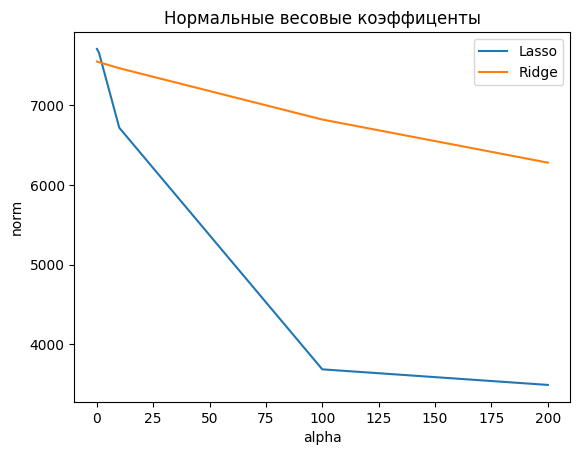

In [37]:
lasso_norms = []
ridge_norms = []

# for alpha in alphas:
#     # Создание объекта Lasso-регрессии и обучение модели
#     lasso = Lasso(alpha=alpha).fit(data_train, target_train)
#     lasso_norms.append(np.linalg.norm(lasso.coef_))
    
#     # Создание объекта Ridge-регрессии и обучение модели
#     ridge = Ridge(alpha=alpha).fit(data_train, target_train)
#     ridge_norms.append(np.linalg.norm(ridge.coef_))

# создание списка весовых коэффициентов
lasso_norms = [np.linalg.norm(Lasso(alpha=alpha).fit(data_train, target_train).coef_) for alpha in alphas]
ridge_norms = [np.linalg.norm(Ridge(alpha=alpha).fit(data_train, target_train).coef_) for alpha in alphas]

plt.plot(alphas, lasso_norms, label='Lasso')
plt.plot(alphas, ridge_norms, label='Ridge')
plt.xlabel('alpha')
plt.ylabel('norm')
plt.title('Нормальные весовые коэффиценты')
plt.legend()
plt.show()

**Какой метод агрессивнее уменьшает веса?**

Lasso-регрессия более агрессивно уменьшает веса, поскольку при использовании L1-регуляризации происходит зануление некоторых коэффициентов.

**Поясните, почему Lasso-регрессию часто используют для отбора признаков?**

Lasso-регрессия применяется для отбора признаков, потому что при использовании L1-регуляризации некоторые коэффициенты становятся равными нулю, что означает, что соответствующие признаки не оказывают влияния на модель. Таким образом, Lasso-регрессия может помочь выявить наиболее информативные признаки. В случае Ridge-регрессии коэффициенты стремятся к нулю, но не достигают нуля, что не выделяет неважные признаки.

**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [38]:
from sklearn.linear_model import LassoCV


# Создайте и обучите LassoCV с параметрами alphas и cv=5
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=17).fit(data_train, target_train)

# Получите матрицу ошибок и усредните ошибки по строкам
mse_means = lasso_cv.mse_path_.mean(axis=1)

# Определите оптимальное значение параметра α
optimal_alpha = lasso_cv.alphas_[np.argmin(mse_means)]

print("Оптимальное α =", optimal_alpha)

c:\Users\isgul\Programming\PycharmProjects\fortesto\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 511839175.9456253, tolerance: 48476565.46527788
  model = cd_fast.enet_coordinate_descent_gram(


Оптимальное α = 1.0


**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [39]:
cols = new_data.columns
# Создайте объект Lasso-регрессии с оптимальным значением параметра α и обучим
lasso_final = Lasso(alpha=optimal_alpha).fit(data_train, target_train)

# Выведите полученные коэффициенты
lasso_coef = pd.DataFrame(zip(cols, lasso_final.coef_), columns=["Feature", "Coefficient"])
lasso_coef

,Feature,Coefficient
0,carat,5290.023058
1,depth,-91.212070
2,table,-62.200590
3,x,-1061.663033
4,y,-3.485158
5,z,-34.622011
6,cut_Fair,-714.616558
7,cut_Good,-137.728050
8,cut_Ideal,99.642244
9,cut_Premium,28.204148


**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [40]:
# Предсказание цен на тестовой выборке с помощью обученной Lasso-регрессии
lasso_pred = lasso_final.predict(data_test)

# Вычисление среднеквадратичной ошибки для Lasso-регрессии на тестовой выборке
lasso_mse = mean_squared_error(target_test, lasso_pred)

# Предсказание цен на тестовой выборке с помощью обычной линейной регрессии
linear_pred = regressor.predict(data_test)

# Вычисление среднеквадратичной ошибки для обычной линейной регрессии на тестовой выборке
linear_mse = mean_squared_error(target_test, linear_pred)

# Вывод среднеквадратичной ошибки для обеих моделей
print(f"Среднеквадратичная ошибка Lasso-регрессии на тестовой выборке: {lasso_mse}")
print(f"Среднеквадратичная ошибка обычной линейной регрессии на тестовой выборке: {linear_mse}")

Среднеквадратичная ошибка Lasso-регрессии на тестовой выборке: 1244173.0045646103
Среднеквадратичная ошибка обычной линейной регрессии на тестовой выборке: 1244765.4357158684
